In [17]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fix_yahoo_finance as fyf

C:\Users\Admin\anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [57]:
# User Inputs
tickers =['AAPL','FB', 'GOOG','NFLX', 'AMZN','TSLA' ]
start = dt.datetime(2014, 1, 1 )
end = dt.datetime(2021, 1, 1)
number_of_portfolios = 1150

In [59]:
# Return Calculation
returns = pd.DataFrame()
for ticker in tickers:
    data = fyf.download(ticker, start , end)
    data= pd.DataFrame(data)
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how ='outer')
        


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [60]:
returns

,AAPL,FB,GOOG,NFLX,AMZN,TSLA
Date,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.014064,0.001098,-0.006772,-0.014531,-0.002056,-0.002194
2014-01-03,-0.021966,-0.002742,-0.007295,0.000772,-0.003845,-0.003598
2014-01-06,0.005453,0.048387,0.011149,-0.009722,-0.007088,-0.017117
2014-01-07,-0.007151,0.012587,0.019278,-0.055817,0.011178,0.016054
...,...,...,...,...,...,...
2020-12-24,0.007712,-0.002648,0.003735,-0.000991,-0.003949,0.024444
2020-12-28,0.035766,0.035901,0.021416,0.010020,0.035071,0.002901
2020-12-29,-0.013315,-0.000794,-0.009780,0.022634,0.011584,0.003465


In [43]:
portfolio_returns = []
portfolio_risks = []
sharpe_ratios =[]
portfolio_weights =[]
RF = 0
        
for portfolio in range(number_of_portfolios):
    # Generate Random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)),3)
    portfolio_weights.append(weights)
    # Calculate Annualised returns
    annualised_return = np.sum(returns.mean() * weights) * 252
    portfolio_returns.append(annualised_return)
    # Matrix Covariance & Portfolio risk calculation
    matrix_covariance = returns.cov() *252
    portfolio_variance = np.dot(weights.T, 
                                np.dot(matrix_covariance, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)
    
    # Sharpe Ratio
    sharpe_ratio = (annualised_return -RF) / portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)
    
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
sharpe_ratio = np.array(sharpe_ratios)

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]

portfolio_df = pd.DataFrame(portfolio_metrics).T
portfolio_df.columns = ['Return', 'Risk', 'Sharpe','Weights']

In [44]:
min_risk = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
highest_return = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]

print('Lowest Risk')
print(min_risk)
print(tickers)
print('')

print('Highest Return')
print(highest_return)
print(tickers)
print('')

print('Highest Sharpe Ratio')
print(highest_sharpe)
print(tickers)
print('')



Lowest Risk
Return                                       0.272585
Risk                                          0.23928
Sharpe                                        1.13919
Weights    [0.367, 0.005, 0.516, 0.024, 0.053, 0.034]
Name: 733, dtype: object
['AAPL', 'FB', 'GOOG', 'NFLX', 'AMZN', 'TSLA']

Highest Return
Return                                       0.484329
Risk                                         0.362983
Sharpe                                         1.3343
Weights    [0.084, 0.077, 0.019, 0.291, 0.034, 0.496]
Name: 861, dtype: object
['AAPL', 'FB', 'GOOG', 'NFLX', 'AMZN', 'TSLA']

Highest Sharpe Ratio
Return                                      0.392836
Risk                                        0.269425
Sharpe                                       1.45805
Weights    [0.338, 0.008, 0.015, 0.091, 0.358, 0.19]
Name: 1091, dtype: object
['AAPL', 'FB', 'GOOG', 'NFLX', 'AMZN', 'TSLA']



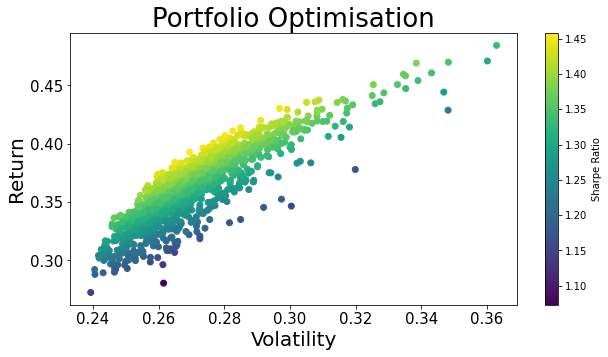

In [45]:
# Visualisation

plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, c=portfolio_returns/portfolio_risks )
plt.title('Portfolio Optimisation', fontsize = 26)
plt.xlabel('Volatility', fontsize =20)
plt.ylabel('Return', fontsize =20)
plt.xticks(fontsize =15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe Ratio')
plt.show()


In [49]:
!pip install PyPortfolioOpt

^C


In [48]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns

In [62]:

# Return Calculation
returns = pd.DataFrame()
for ticker in tickers:
    data = fyf.download(ticker, start , end)
    data= pd.DataFrame(data)
    data[ticker] = data['Adj Close']
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how ='outer')
        

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [63]:
# Portfolio Optimisation

# Calculate the expected returns and the annulaised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(returns)
s = risk_models.sample_cov(returns)

#Optimise for max sharpe ratio
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.39071), ('FB', 0.0), ('GOOG', 0.0), ('NFLX', 0.12468), ('AMZN', 0.27678), ('TSLA', 0.20783)])
Expected annual return: 39.4%
Annual volatility: 27.3%
Sharpe Ratio: 1.37


(0.39425342219859383, 0.2728740330052655, 1.3715245018985445)

In [ ]:
# Get the discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(returns)
weights= cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 15000)

allocation , leftover = da.lp_portfolio()
print('Discrete Allocation: ',allocation)
print('Funds remainin: ${:.2f}'.format(leftover))